In [1]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

2023-06-11 23:28:02.281802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
X = tf.compat.v1.placeholder(dtype=tf.float32, shape=(4,2))
Y = tf.compat.v1.placeholder(dtype=tf.float32, shape=(4,1))

In [3]:
INPUT_XOR = [[0,0],[0,1],[1,0],[1,1]]
OUTPUT_XOR = [[0],[1],[1],[0]]

In [4]:
learning_rate = 0.01
epochs = 10000

In [5]:
# Hidden Layer
with tf.compat.v1.variable_scope('hidden'):
    h_w = tf.Variable(tf.compat.v1.truncated_normal([2,2]), name='weights')
    h_b = tf.Variable(tf.compat.v1.truncated_normal([4,2]), name='biases')
    h = tf.nn.relu(tf.matmul(X, h_w) + h_b)

In [6]:
# Output Layer
with tf.compat.v1.variable_scope('output'):
    o_w = tf.Variable(tf.compat.v1.truncated_normal([2,1]), name='weights')
    o_b = tf.Variable(tf.compat.v1.truncated_normal([4,1]), name='biases')
    Y_estimation = tf.nn.sigmoid(tf.matmul(h, o_w) + o_b)

In [7]:
with tf.compat.v1.variable_scope('cost'):
    cost = tf.reduce_mean(tf.compat.v1.squared_difference(Y_estimation, Y))

In [8]:
with tf.compat.v1.variable_scope('train'):
    train = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(cost)

In [9]:
with tf.compat.v1.Session() as session :
    session.run(tf.compat.v1.global_variables_initializer())

    log_count_frac = epochs/10
    for epoch in range(epochs):
        session.run(train, feed_dict={X:INPUT_XOR, Y:OUTPUT_XOR})

        if epoch % log_count_frac == 0:
            cost_result = session.run(cost, feed_dict={X:INPUT_XOR, Y:OUTPUT_XOR})
            print(cost_result)

    print("Training Completed!")
    Y_test = session.run(Y_estimation, feed_dict={X:INPUT_XOR})
    print(Y_test)

2023-06-11 23:28:03.883131: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-06-11 23:28:03.885662: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


0.3356719
0.0016335004
0.00044487958
0.00018985849
9.561284e-05
5.2134397e-05
2.9671022e-05
1.7305014e-05
1.0240408e-05
6.1136934e-06
Training Completed!
[[0.00321069]
 [0.99969304]
 [0.9997292 ]
 [0.00205215]]


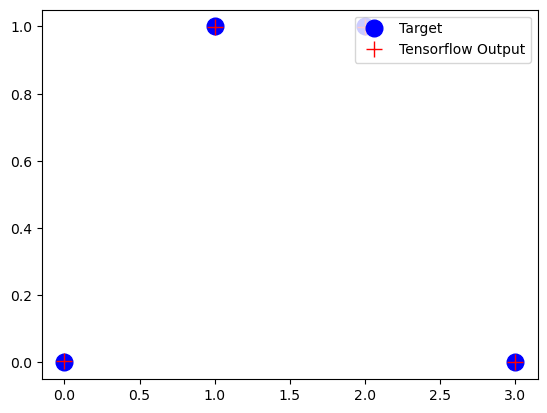

In [10]:
import matplotlib.pyplot as plt
plt.plot(OUTPUT_XOR, 'bo', label='Target', linewidth=2, markersize=12)
plt.plot(Y_test, 'r+', label='Tensorflow Output', linewidth=2, markersize=12)
plt.legend(loc='upper right')
plt.show()